## Exploration

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../data/train.csv')

In [3]:
train.shape

(9063, 13)

In [4]:
train.describe()

,Unnamed: 0,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.00000,9063.000000,9063.000000,9063.000000,9063.000000
mean,4531.000000,2.256538,0.026371,0.682886,1.408695,20.454037,23.855776,61.09776,12.968729,35.175770,143.530067,178.705837
std,2616.407078,1.041754,0.160245,0.465378,0.635883,8.079983,8.787939,19.55179,8.262341,48.868148,140.005449,170.535533
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,2265.500000,1.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.00000,7.001500,4.000000,33.000000,39.000000
50%,4531.000000,2.000000,0.000000,1.000000,1.000000,21.320000,24.240000,61.00000,12.998000,16.000000,109.000000,134.000000
75%,6796.500000,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,77.00000,19.001200,48.000000,206.000000,266.000000
max,9062.000000,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.00000,56.996900,367.000000,790.000000,897.000000


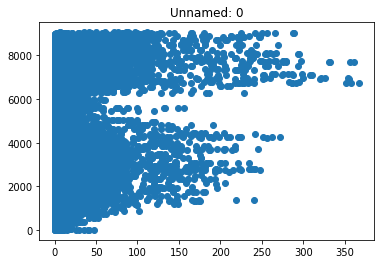

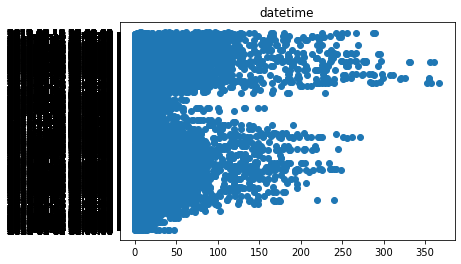

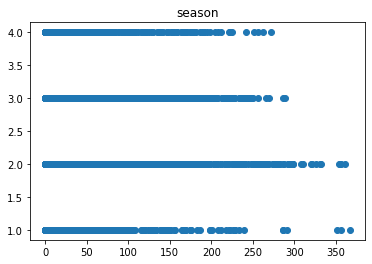

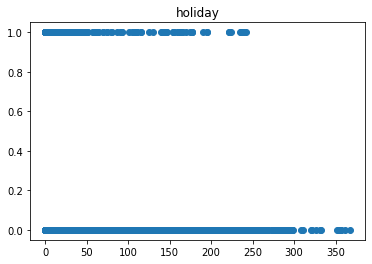

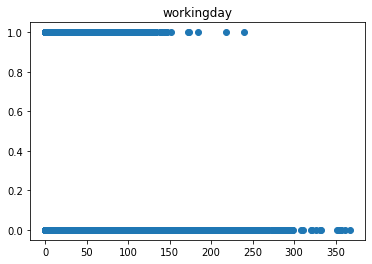

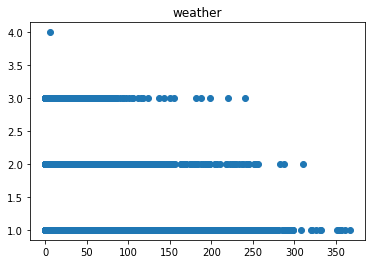

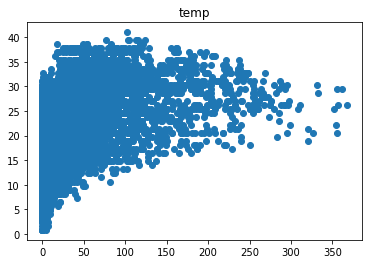

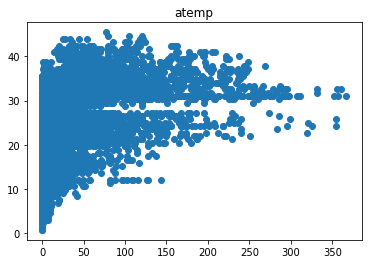

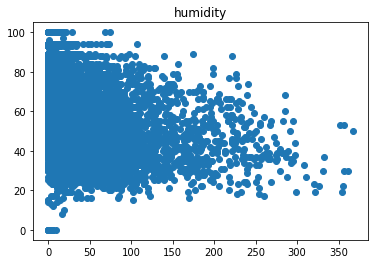

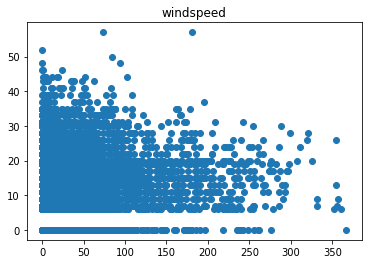

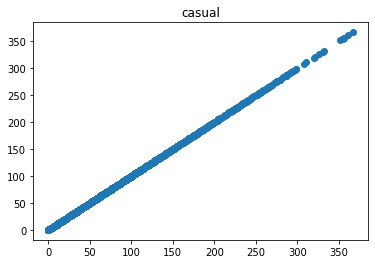

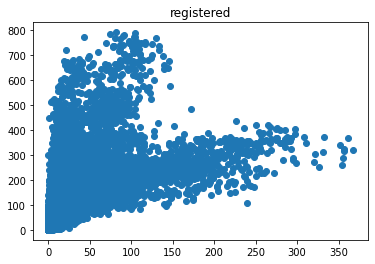

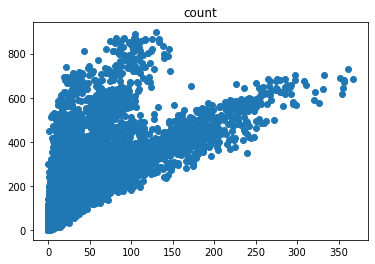

In [5]:
for col in train.columns:
    plt.scatter(x = train['casual'], y =train[col])
    plt.title(col)  
    plt.show()

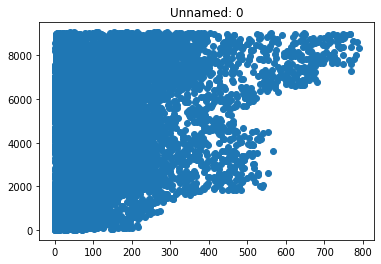

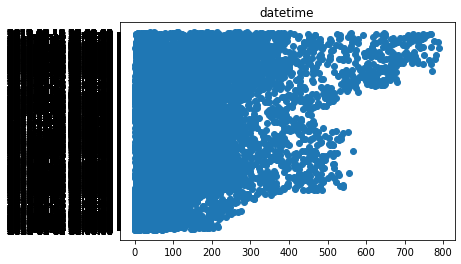

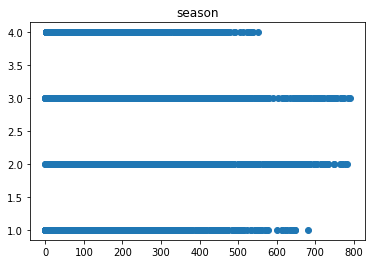

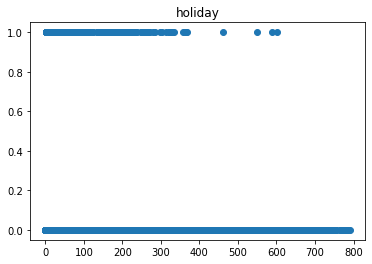

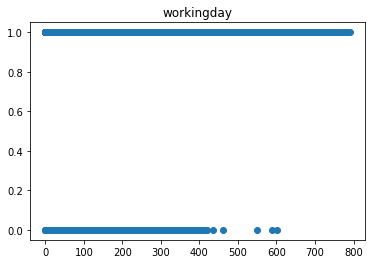

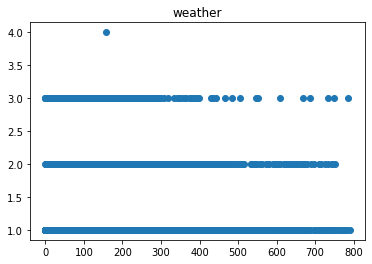

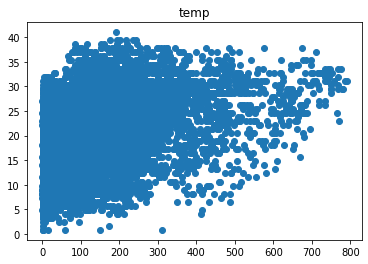

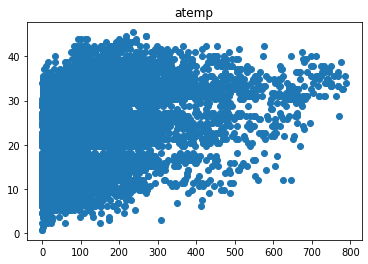

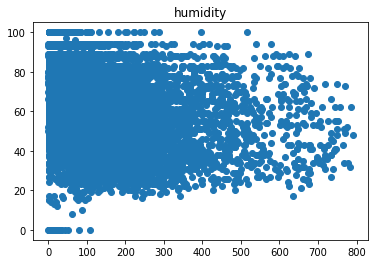

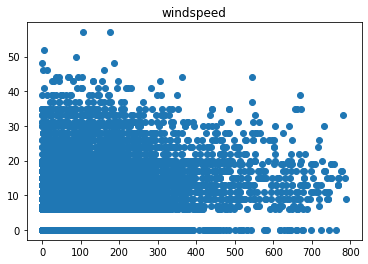

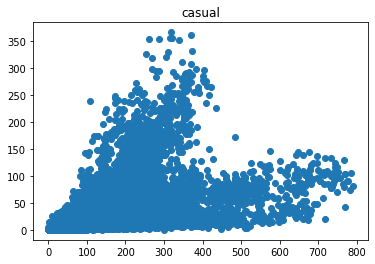

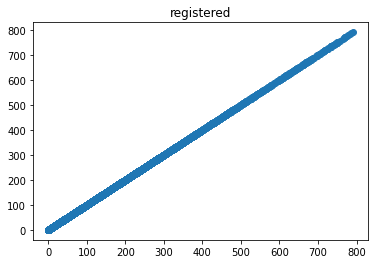

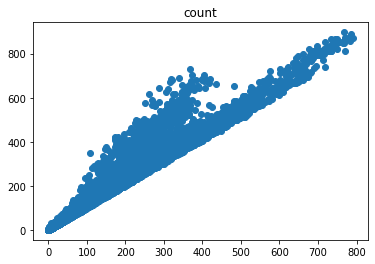

In [6]:
for col in train.columns:
    plt.scatter(x = train['registered'], y =train[col])
    plt.title(col)  
    plt.show()

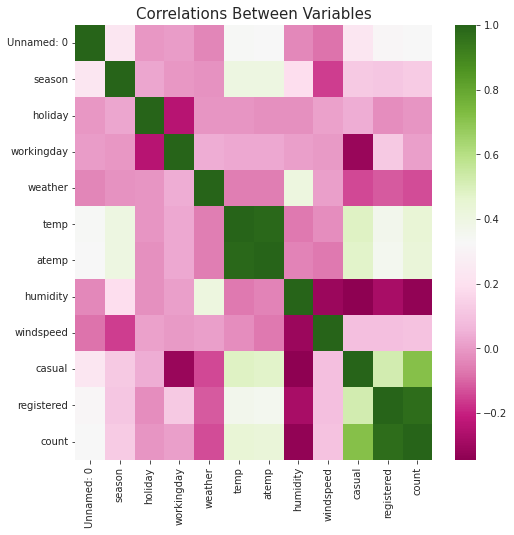

In [7]:
with sns.axes_style('ticks', {'figure.facecolor': 'white'}):
    plt.figure(figsize=(8,8))
    sns.heatmap(train.corr(),cmap="PiYG")
    plt.title("Correlations Between Variables", size=15)
    plt.show()

In [8]:
train =train.drop(columns=['casual','registered'],axis=1)

## Cluestering 

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


#num_attributes = ['order_item_id', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 
#                'payment_value', 'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'order_purchase_hour']
# cat_attributes = ['order_status', 'customer_state', 'payment_type']


num_attributes = train.select_dtypes(include=['float']).columns.tolist()
cat_attributes = train.select_dtypes(include=['object']).columns.tolist()

pipeline = ColumnTransformer([
        ('num', StandardScaler(), num_attributes),
        ('cat', OneHotEncoder(), cat_attributes),
])
df_prepared = pipeline.fit_transform(train)
df_prepared


<9063x9066 sparse matrix of type '<class 'numpy.float64'>'
	with 36252 stored elements in Compressed Sparse Row format>

In [10]:
from sklearn.decomposition import PCA

df_prepared = df_prepared.toarray()
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df_prepared)
df_reduced.shape


(9063, 7250)

In [11]:
from sklearn.cluster import KMeans

k_range = range(2, 15)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_reduced)
                for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]


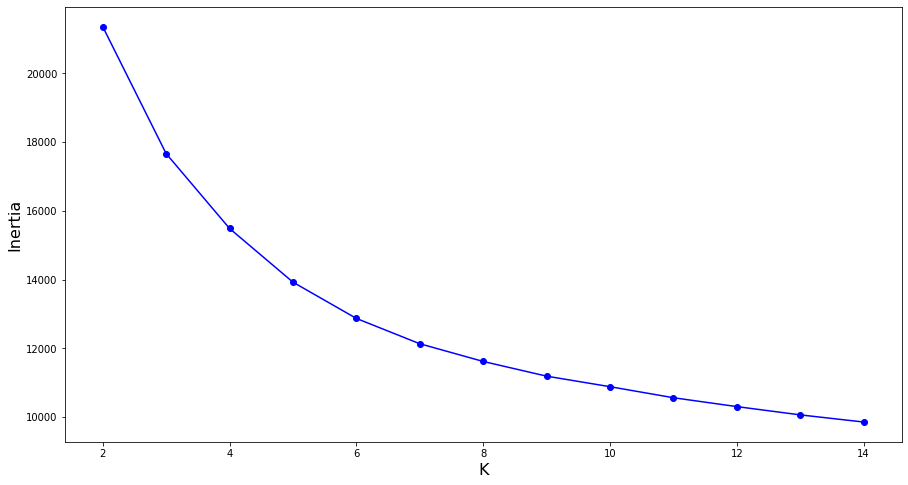

In [12]:
plt.figure(figsize=(15, 8))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('K', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.show()

In [13]:


from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(df_reduced, model.labels_)
                      for model in kmeans_per_k]



In [14]:
import numpy as np 

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]
# Best number of clusters
best_k

2

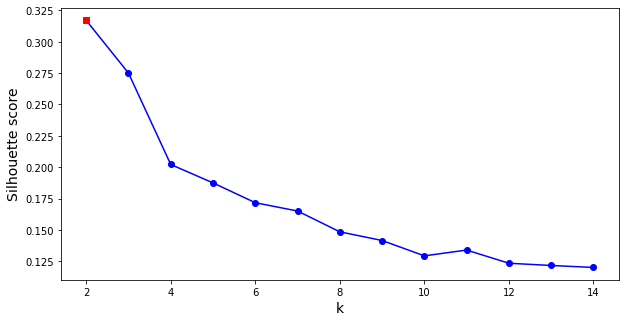

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

In [26]:
best_model = kmeans_per_k[2]
best_model

KMeans(n_clusters=4, random_state=42)

In [27]:


y_pred = best_model.fit_predict(df_reduced)



In [28]:


from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(df_prepared)



/home/valentin/anaconda3/envs/exercice_flask/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/valentin/anaconda3/envs/exercice_flask/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


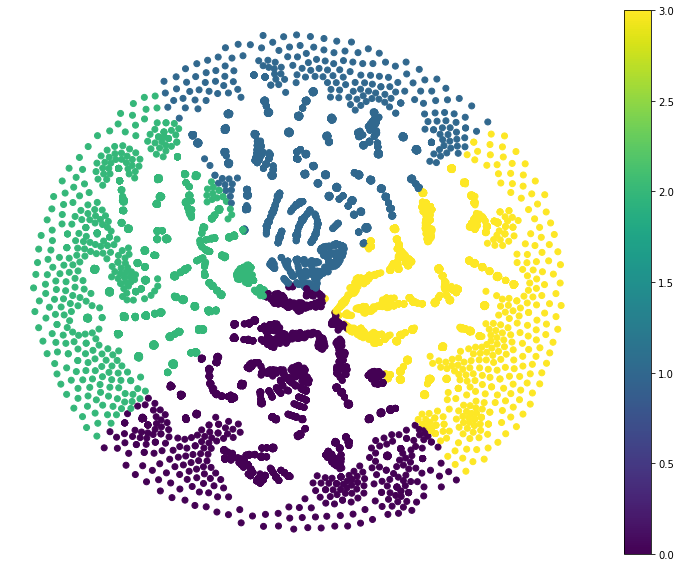

In [29]:


plt.figure(figsize=(13,10 ))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1],c=y_pred)
plt.axis('off')
plt.colorbar()
plt.show()

